<a href="https://colab.research.google.com/github/abhaysaxena1904/MNIST/blob/main/MNIST_Kaggle_DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Data

In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhaysaxena1996","key":"6783664d80043b280e48ae2519d961f5"}'}

In [4]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 33.1MB/s]
 55% 5.00M/9.16M [00:00<00:00, 38.5MB/s]
100% 9.16M/9.16M [00:00<00:00, 54.6MB/s]
 82% 5.00M/6.09M [00:00<00:00, 44.1MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.9MB/s]


In [155]:
!unzip /content/train.csv.zip
!unzip /content/test.csv.zip

Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Importing Libraries

In [7]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy

from PIL import Image
from scipy import ndimage


from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import regularizers

np.random.seed(7)


%matplotlib inline

In [156]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Splitting Data



In [157]:
y = training_data.pop('label')
X = training_data
X_test = test_data

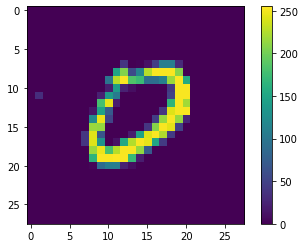

In [221]:
# Train Data Vizualisation
index = 3

X = np.array(X)
X = X.reshape(X.shape[0], 28, 28)

plt.imshow(X[index])
plt.colorbar()
plt.grid(False)
plt.show()

Target variable is converted to a one hot matrix. We use the function <i> one_hot </i> to convert the target dataset to one hot encoding.


In [158]:
def one_hot(j):
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [159]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
one_hot(data)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [160]:
def data_wrapper():
    tr_d = load_data()
    te_d = load_data()
    
    training_inputs = np.array(X).T
    training_results = np.array(y)
    train_set_y = one_hot(training_results)
        
    test_inputs = np.array(X_test).T
    
    return (training_inputs, train_set_y, test_inputs)

In [161]:
train_set_x, train_set_y, test_set_x = data_wrapper()

For implementing in Keras, the input training and input target dataset are supposed to have shape (m, n) where m is the number of training samples and n is the number of parts in a single input.
<br> Hence, let create the desired dataset shapes by taking transpose.

In [162]:
train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T

Now, let's see if the datasets are in the desired shape:

In [163]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))

train_set_x shape: (42000, 784)
train_set_y shape: (42000, 10)
test_set_x shape: (28000, 784)


# Making the Model

In [164]:
# create model
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation = 'relu'))
nn_model.add(Dense(10, activation='softmax'))

Before we run the model on the training datasets, we compile the model in which we define various things like the loss function, the optimizer and the evaluation metric.

In [165]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, to fit the model on the training input and training target dataset, we run the following command using a minibatch of size 10 and 10 epochs.

In [222]:
nn_model.fit(train_set_x, train_set_y, epochs=20, batch_size=10)

Epoch 1/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.7204 - accuracy: 0.7576
Epoch 2/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.7118 - accuracy: 0.7593
Epoch 3/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6998 - accuracy: 0.7645
Epoch 4/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6941 - accuracy: 0.7696
Epoch 5/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6846 - accuracy: 0.7757
Epoch 6/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6840 - accuracy: 0.7759
Epoch 7/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6807 - accuracy: 0.7763
Epoch 8/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6797 - accuracy: 0.7780
Epoch 9/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.6646 - accuracy: 0.7832
Epoch 10/20
4200/4200 [==============================] - 7s 2ms/step - loss: 0.673

In [223]:
scores_train = nn_model.evaluate(train_set_x, train_set_y)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_train[1]*100))

1313/1313 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8945

accuracy: 89.45%


We can see that the model has significant accuracy on the training dataset.

Now, let's make predictions on the test dataset.

In [224]:
predictions = nn_model.predict(test_set_x)
predictions = np.argmax(predictions, axis = 1)
predictions

array([2, 0, 9, ..., 3, 9, 2])

# Submission

In [187]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [231]:
submission = pd.DataFrame(columns= ['ImageId','Label'])
submission.ImageId = np.arange(1,28001,1)
submission.Label = predictions
submission = submission.set_index('ImageId')
submission.to_csv('submission.csv')
#files.download('submission.csv')
submission
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "First Kaggle Competition Submission"

100% 208k/208k [00:02<00:00, 103kB/s]
Successfully submitted to Digit Recognizer

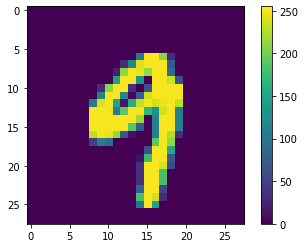

In [220]:
# Test Data Vizualisation
index = 27998

X = np.array(X_test)
X = X.reshape(X.shape[0], 28, 28)

plt.imshow(X[index])
plt.colorbar()
plt.grid(False)
plt.show()